This notebook documents how the greatest weighted simple path is found between community route start and end nodes as found in the node ranking process.

In [2]:
import osmnx as ox
import networkx as nx
import config
import route_planning.helpers.route_planning_helper as helper

Load the graph where route start and end nodes are flagged.

Then create a subgraph for each community,
this will ensure simple paths found stay within a community's boundaries,
reducing computation time.

In [3]:
%%time
G = ox.load_graphml(filepath=f"{config.rp_graphml_path}/route_start_end_flagged.graphml")

nodes, edges = ox.graph_to_gdfs(G)
community_labels = list(nodes["community"].unique())

community_graphs = []
for label in community_labels:
    community_nodes = []
    for x, y in G.nodes(data=True):
        if y["community"] == label:
            community_nodes.append(x)
    sub = G.subgraph(community_nodes)
    community_graphs.append(sub)

CPU times: user 1.41 s, sys: 32.9 ms, total: 1.44 s
Wall time: 1.47 s


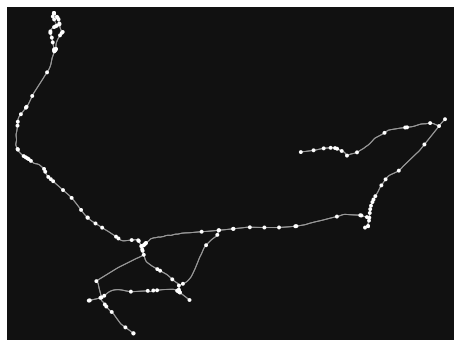

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe00e339850>)

In [18]:
ox.plot_graph(community_graphs[0])

In [4]:
%%time
start_node = None
end_node = None
for x, y in community_graphs[0].nodes(data=True):
    if "route_flag" in y:
        if y["route_flag"] == "1":
            start_node = x
        elif y["route_flag"] == "2":
            end_node = x
#ox.plot_graph(community_graphs[0], node_size=10)

# heaviest_path = max((path for path in nx.all_simple_paths(community_graphs[0],
#                                                           source=start_node,
#                                                           target=end_node)),
#                     key=lambda path: path_weight(path))
#paths = list(nx.all_simple_paths(community_graphs[0], source=start_node, target=end_node))

CPU times: user 574 µs, sys: 77 µs, total: 651 µs
Wall time: 665 µs


In [5]:
heaviest_path = max((path for path in nx.all_simple_paths(community_graphs[0],
                                                          source=start_node,
                                                          target=end_node)),
                    key=lambda path: helper.path_weight(community_graphs[0], path))

In [ ]:
community_nodes_ = []
for x, y in G.nodes(data=True):
    if y["community"] == "2":
        community_nodes_.append(x)
sub = G.subgraph(community_nodes_)
ox.plot_graph(sub)